In [3]:
import numpy as np
import pandas as pd
import xarray as xr

In [9]:
ds_all_resuts = xr.open_dataset('/Users/shazarika/ProjectSpace/currentProjects/AiBEDO/codebase/aibedo_demo_data/predictions_CESM2_val_3b6fg6sb_MLP_spherical_0constraints.nc')
ds_all = xr.open_dataset('/Users/shazarika/ProjectSpace/currentProjects/AiBEDO/codebase/aibedo_demo_data/compress.isosph.CESM2.historical.r1i1p1f1.Input.Exp8_fixed.nc')

In [8]:
ds_all_resuts.tas_targets.data.shape

(297, 40962)

In [7]:
ds_all_resuts

<xarray.Dataset>
Dimensions:        (snapshot: 297, spatial_dim: 40962)
Coordinates:
    longitude      (spatial_dim) float64 -90.0 -90.0 90.0 ... -22.61 -21.59
    latitude       (spatial_dim) float64 58.28 -58.28 58.28 ... 0.5922 1.773 0.0
  * snapshot       (snapshot) int64 0 1 2 3 4 5 6 ... 291 292 293 294 295 296
Dimensions without coordinates: spatial_dim
Data variables: (12/15)
    tas_preds      (snapshot, spatial_dim) float32 278.5 274.6 ... 299.5 298.9
    tas_targets    (snapshot, spatial_dim) float32 ...
    tas_bias       (snapshot, spatial_dim) float32 ...
    tas_mae        (snapshot, spatial_dim) float32 ...
    tas_mae_score  (snapshot, spatial_dim) float32 ...
    ps_preds       (snapshot, spatial_dim) float32 ...
    ...             ...
    ps_mae_score   (snapshot, spatial_dim) float32 ...
    pr_preds       (snapshot, spatial_dim) float32 ...
    pr_targets     (snapshot, spatial_dim) float32 ...
    pr_bias        (snapshot, spatial_dim) float32 ...
    pr_mae         (snapshot, spatial_dim) float32 ...
    pr_mae_score   (snapshot, spatial_dim) float32 ...
Attributes:
    description:     ML emulated predictions.
    dataset_name:    CESM2_val
    variable_names:  tas;ps;pr

In [18]:
from sklearn.metrics import mean_squared_error

In [11]:
lon = ds_all.lon.data
lat = ds_all.lat.data

In [77]:
#create parition information dataframe
def get_lat_lon_df(lat, lon, gt, pred):
    new_array = np.vstack((lat, lon, gt, pred))
    # print(new_array.shape)
    column_name = ['lat', 'lon', 'gt', 'pred']
    # creating the dataframe
    new_df = pd.DataFrame(data = new_array.T, columns = column_name)
    return new_df

In [20]:
t = 10

In [28]:
rr = mean_squared_error(temp_gt, temp_pred, squared=False)

In [29]:
rr

2.0012622

In [43]:
temp_gt = ds_all_resuts.tas_targets.data[t,:]
temp_pred = ds_all_resuts.tas_preds.data[t,:]
temp_df = get_lat_lon_df(lat, lon, temp_gt, temp_pred)

(4, 40962)


In [109]:
temp_gt.shape

(40962,)

In [110]:
rmselist_time_1 = []
for t in range(297):
    rmse_list = []
    temp_gt = ds_all_resuts.tas_targets.data[t,:]
    temp_pred = ds_all_resuts.tas_preds.data[t,:]
    temp_df = get_lat_lon_df(lat, lon, temp_gt, temp_pred)
    
    temp_mean = np.mean(temp_gt)

    for lt in range(-90, 90, 5):

        tt_gt = temp_df[(temp_df['lat'] > lt) & (temp_df['lat'] <= lt+5)]['gt'].values
        tt_pred = temp_df[(temp_df['lat'] > lt) & (temp_df['lat'] <= lt+5)]['pred'].values

        rr = mean_squared_error(tt_gt, tt_pred, squared=False)
        rmse_list.append(rr/temp_mean)
        # print(rr)
        # print(lt, lt+5)
    rmselist_time_1.append(rmse_list)

In [62]:
import matplotlib.pyplot as plt

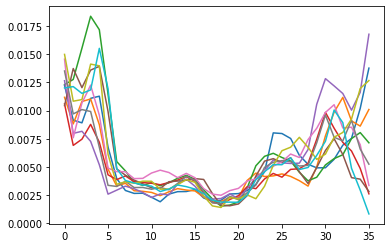

In [112]:
for i in range(10):
    plt.plot(rmselist_time_1[i])


In [116]:
rmselist_time_array = np.array(rmselist_time_1)

In [117]:
tas_mean_curve = np.mean(rmselist_time_array, axis=0)
tas_std_curve = np.std(rmselist_time_array, axis=0)

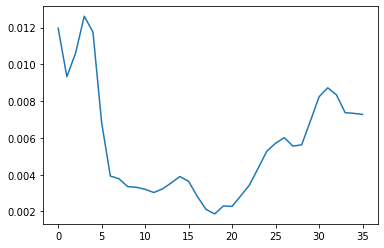

In [118]:
plt.plot(tas_mean_curve)

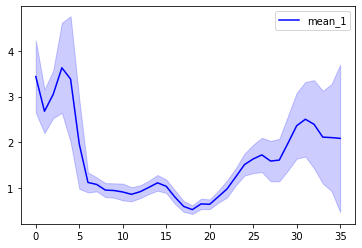

In [75]:
x = np.arange(len(tas_mean_curve))
plt.plot(x, tas_mean_curve, 'b-', label='mean_1')
plt.fill_between(x, tas_mean_curve - tas_std_curve, tas_mean_curve + tas_std_curve, color='b', alpha=0.2)
plt.legend()
plt.show()

In [113]:
ps_rmselist_time_1 = []
for t in range(297):
    rmse_list = []
    temp_gt = ds_all_resuts.ps_targets.data[t,:]
    temp_pred = ds_all_resuts.ps_preds.data[t,:]
    temp_df = get_lat_lon_df(lat, lon, temp_gt, temp_pred)

    temp_mean = np.mean(temp_gt)
    for lt in range(-90, 90, 5):

        tt_gt = temp_df[(temp_df['lat'] > lt) & (temp_df['lat'] <= lt+5)]['gt'].values
        tt_pred = temp_df[(temp_df['lat'] > lt) & (temp_df['lat'] <= lt+5)]['pred'].values

        rr = mean_squared_error(tt_gt, tt_pred, squared=False)
        rmse_list.append(rr/temp_mean)
        # print(rr)
        # print(lt, lt+5)
    ps_rmselist_time_1.append(rmse_list)

In [114]:
ps_rmselist_time_array = np.array(ps_rmselist_time_1)
#ps_rmselist_time_array = ps_rmselist_time_array/100
ps_mean_curve = np.mean(ps_rmselist_time_array, axis=0)
ps_std_curve = np.std(ps_rmselist_time_array, axis=0)

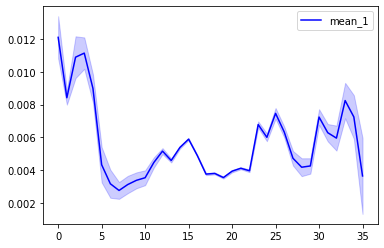

In [115]:
x = np.arange(len(tas_mean_curve))
plt.plot(x, ps_mean_curve, 'b-', label='mean_1')
plt.fill_between(x, ps_mean_curve - ps_std_curve, ps_mean_curve + ps_std_curve, color='b', alpha=0.2)
plt.legend()
plt.show()

In [122]:
pr_rmselist_time_1 = []
for t in range(297):
    rmse_list = []
    temp_gt = ds_all_resuts.pr_targets.data[t,:]
    temp_pred = ds_all_resuts.pr_preds.data[t,:]
    temp_df = get_lat_lon_df(lat, lon, temp_gt, temp_pred)

    temp_mean = np.mean(temp_gt)
    for lt in range(-90, 90, 5):

        tt_gt = temp_df[(temp_df['lat'] > lt) & (temp_df['lat'] <= lt+5)]['gt'].values
        tt_pred = temp_df[(temp_df['lat'] > lt) & (temp_df['lat'] <= lt+5)]['pred'].values

        rr = mean_squared_error(tt_gt, tt_pred, squared=False)
        rmse_list.append(rr/temp_mean)
        # print(rr)
        # print(lt, lt+5)
    pr_rmselist_time_1.append(rmse_list)

In [123]:
pr_rmselist_time_array = np.array(pr_rmselist_time_1)
pr_mean_curve = np.mean(pr_rmselist_time_array, axis=0)
pr_std_curve = np.std(pr_rmselist_time_array, axis=0)

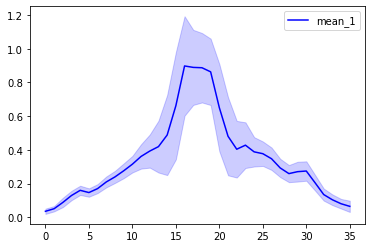

In [124]:
x = np.arange(len(tas_mean_curve))
plt.plot(x, pr_mean_curve, 'b-', label='mean_1')
plt.fill_between(x, pr_mean_curve - pr_std_curve, pr_mean_curve + pr_std_curve, color='b', alpha=0.2)
plt.legend()
plt.show()

In [125]:
x = np.linspace(-90,90, 36)

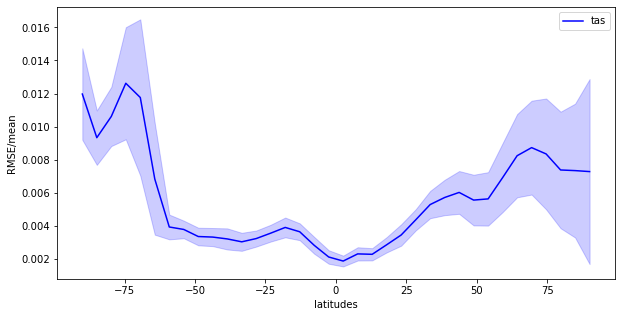

In [128]:
plt.figure(figsize=(10,5))
#x = np.arange(len(tas_mean_curve))
plt.plot(x, tas_mean_curve, 'b-', label='tas')
plt.fill_between(x, tas_mean_curve - tas_std_curve, tas_mean_curve + tas_std_curve, color='b', alpha=0.2)

# plt.plot(x, ps_mean_curve, 'r-', label='ps')
# plt.fill_between(x, ps_mean_curve - ps_std_curve, ps_mean_curve + ps_std_curve, color='r', alpha=0.2)

# plt.plot(x, pr_mean_curve, 'g-', label='pr')
# plt.fill_between(x, pr_mean_curve - pr_std_curve, pr_mean_curve + pr_std_curve, color='g', alpha=0.2)

plt.xlabel('latitudes')
# plt.ylabel('RMSE (K)')
plt.ylabel('RMSE/mean')


plt.legend()
plt.show()

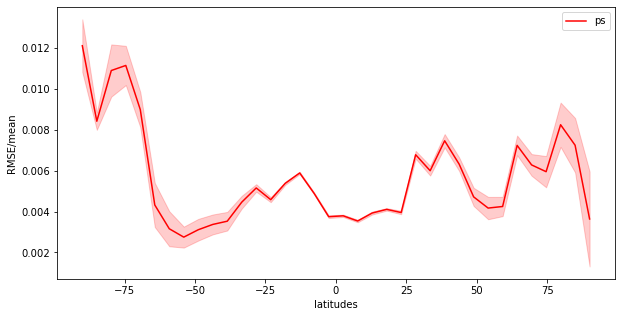

In [129]:
plt.figure(figsize=(10,5))
#x = np.arange(len(tas_mean_curve))
# plt.plot(x, tas_mean_curve, 'b-', label='tas')
# plt.fill_between(x, tas_mean_curve - tas_std_curve, tas_mean_curve + tas_std_curve, color='b', alpha=0.2)

plt.plot(x, ps_mean_curve, 'r-', label='ps')
plt.fill_between(x, ps_mean_curve - ps_std_curve, ps_mean_curve + ps_std_curve, color='r', alpha=0.2)

# plt.plot(x, pr_mean_curve, 'g-', label='pr')
# plt.fill_between(x, pr_mean_curve - pr_std_curve, pr_mean_curve + pr_std_curve, color='g', alpha=0.2)

plt.xlabel('latitudes')
# plt.ylabel('RMSE (hPa)')
plt.ylabel('RMSE/mean')


plt.legend()
plt.show()

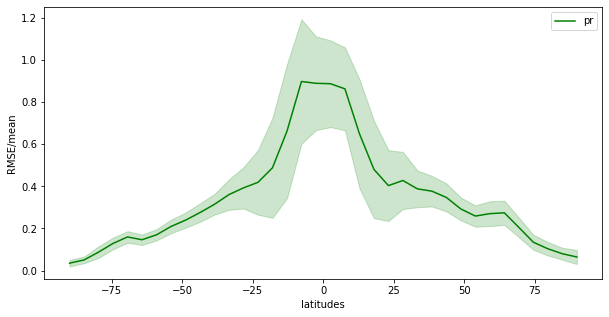

In [130]:
plt.figure(figsize=(10,5))
#x = np.arange(len(tas_mean_curve))
# plt.plot(x, tas_mean_curve, 'b-', label='tas')
# plt.fill_between(x, tas_mean_curve - tas_std_curve, tas_mean_curve + tas_std_curve, color='b', alpha=0.2)

# plt.plot(x, ps_mean_curve, 'r-', label='ps')
# plt.fill_between(x, ps_mean_curve - ps_std_curve, ps_mean_curve + ps_std_curve, color='r', alpha=0.2)

plt.plot(x, pr_mean_curve, 'g-', label='pr')
plt.fill_between(x, pr_mean_curve - pr_std_curve, pr_mean_curve + pr_std_curve, color='g', alpha=0.2)

plt.xlabel('latitudes')
# plt.ylabel('RMSE (mm/day)')
plt.ylabel('RMSE/mean')


plt.legend()
plt.show()

In [107]:
gt = np.load('groundtruth_5.npy')
pr = np.load('prediction_5.npy')

In [108]:
pr.shape

(202, 40962, 3)

In [109]:
import xarray as xr

In [110]:
ds = xr.open_dataset('compress.isosph.CESM2-FV2.historical.r1i1p1f1.Output.nc')

In [111]:
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
lon_list = ds.lon.data
lat_list = ds.lat.data

In [113]:
import random

In [114]:
#random timestep
t = random.randint(1, 198)
print(t)

4


In [115]:
#23, 172, 70

In [116]:
#gt_tas = gt[t, 0, 0, :]
#gt_psl = gt[t, 0, 1, :]
#gt_pr = gt[t, 0, 2, :]

#pr_tas = pr[t, 0, 0, :]
#pr_psl = pr[t, 0, 1, :]
#pr_pr = pr[t, 0, 2, :]

In [117]:
print("Max", max(gt_tas))
print("Min", min(gt_tas))

Max 3.6788721084594727
Min -2.9010605812072754


In [118]:
gt_tas = gt[t, :, 0]
pr_tas = pr[t, :, 0]

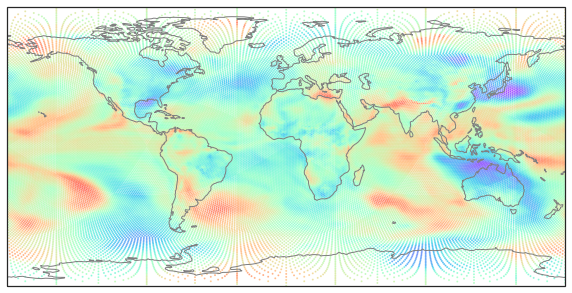

In [119]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(1,1,1, projection=crs.PlateCarree())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="grey")
#ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
#ax.gridlines()

plt.scatter(x=lon_list, y=lat_list,
            c=gt_tas,
            s=1,
            alpha=0.5,
            cmap='rainbow',
            transform=crs.PlateCarree()) ## Important

plt.show()

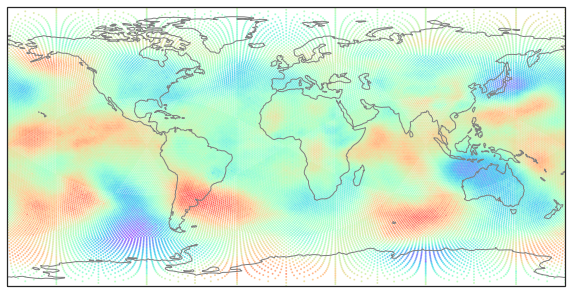

In [120]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(1,1,1, projection=crs.PlateCarree())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="grey")
#ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
#ax.gridlines()

plt.scatter(x=lon_list, y=lat_list,
            c=pr_tas,
            s=1,
            alpha=0.5,
            cmap='rainbow',
            transform=crs.PlateCarree()) ## Important

plt.show()

In [121]:
gt_psl = gt[t, :, 1]
pr_psl = pr[t, :, 1]

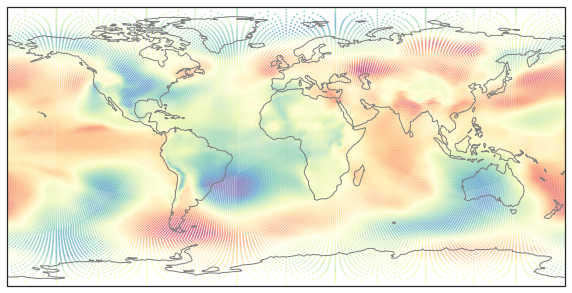

In [122]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(1,1,1, projection=crs.PlateCarree())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="grey")
#ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
#ax.gridlines()

plt.scatter(x=lon_list, y=lat_list,
            c=gt_psl,
            s=1,
            alpha=0.5,
            cmap='Spectral',
            transform=crs.PlateCarree()) ## Important

plt.show()

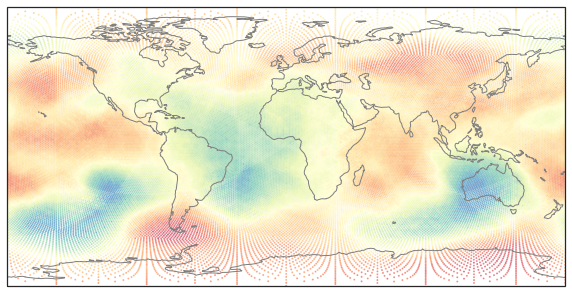

In [123]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(1,1,1, projection=crs.PlateCarree())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="grey")
#ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
#ax.gridlines()

plt.scatter(x=lon_list, y=lat_list,
            c=pr_psl,
            s=1,
            alpha=0.5,
            cmap='Spectral',
            transform=crs.PlateCarree()) ## Important

plt.show()

In [124]:
gt_pre = gt[t, :, 2]
pr_pre = pr[t, :, 2]

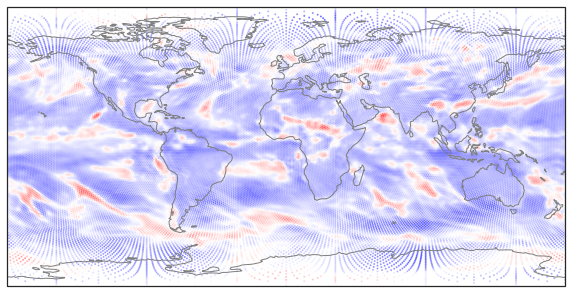

In [125]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(1,1,1, projection=crs.PlateCarree())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="grey")
#ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
#ax.gridlines()

plt.scatter(x=lon_list, y=lat_list,
            c=gt_pre,
            s=1,
            alpha=0.5,
            cmap='bwr',
            transform=crs.PlateCarree()) ## Important

plt.show()

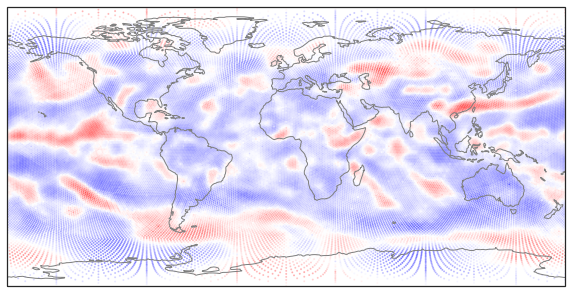

In [126]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(1,1,1, projection=crs.PlateCarree())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="grey")
#ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
#ax.gridlines()

plt.scatter(x=lon_list, y=lat_list,
            c=pr_pre,
            s=1,
            alpha=0.5,
            cmap='bwr',
            transform=crs.PlateCarree()) ## Important

plt.show()

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
def mse(a1, a2):
    return (np.mean((a1-a2)**2))

In [45]:
error_list = []
for i in range(len(gt)):
    error_list.append(mse(gt[i, :, 0], pr[i, :, 0]))

error_list = [i for i in error_list if i > 0.1]

error_list = [i for i in error_list if i < 100]

lsmask_round = [round(x) for x in ds.lsMask.data[0]] 
lsmask_round = [0 if x < 0 else round(x) for x in lsmask_round ]
lsmask_round = [1 if x > 1 else round(x) for x in lsmask_round ]

zipped = list(zip(lon_list, lat_list, error_list, lsmask_round))

df1 = pd.DataFrame(zipped, columns=['Lon', 'Lat', 'error', 'lsmask'])

tropic = df1[(df1.Lat<30) & (df1.Lat>-30)]

temperate = df1[((df1.Lat>30) & (df1.Lat<60)) | ((df1.Lat <-30 ) & (df1.Lat > -60)) ]

arctic = df1[(df1.Lat>60)]

antarctic = df1[(df1.Lat < -60)]

land = df1[(df1.lsmask ==1)]

sea = df1[(df1.lsmask == 0)]

df1['cat'] = 'tas'

In [46]:
df1

,Lon,Lat,error,lsmask,cat
0,-90.000000,58.282526,0.376618,1,tas
1,-90.000000,-58.282526,0.527167,0,tas
2,90.000000,58.282526,0.465080,1,tas
3,90.000000,-58.282526,0.366807,0,tas
4,121.717474,0.000000,0.652030,1,tas
...,...,...,...,...,...
193,-58.898207,-75.103681,0.392467,1,tas
194,-48.762279,-66.383039,0.375127,0,tas
195,74.846215,-59.874637,0.336095,0,tas
196,44.352404,-57.555496,0.362841,0,tas


In [47]:
error_list = []
for i in range(len(gt)):
    error_list.append(mse(gt[i, :, 1], pr[i, :, 1]))

error_list = [i for i in error_list if i > 0.1]

error_list = [i for i in error_list if i < 100]

lsmask_round = [round(x) for x in ds.lsMask.data[0]] 
lsmask_round = [0 if x < 0 else round(x) for x in lsmask_round ]
lsmask_round = [1 if x > 1 else round(x) for x in lsmask_round ]

zipped = list(zip(lon_list, lat_list, error_list, lsmask_round))

df2 = pd.DataFrame(zipped, columns=['Lon', 'Lat', 'error', 'lsmask'])

df2['cat'] = 'psl'

tropic = df2[(df2.Lat<30) & (df2.Lat>-30)]

temperate = df2[((df2.Lat>30) & (df2.Lat<60)) | ((df2.Lat <-30 ) & (df2.Lat > -60)) ]

arctic = df2[(df2.Lat>60)]

antarctic = df2[(df2.Lat < -60)]

land = df2[(df2.lsmask ==1)]

sea = df2[(df2.lsmask == 0)]

df2['cat'] = 'psl'

In [48]:
df2

,Lon,Lat,error,lsmask,cat
0,-90.000000,58.282526,0.395409,1,psl
1,-90.000000,-58.282526,0.592252,0,psl
2,90.000000,58.282526,0.919875,1,psl
3,90.000000,-58.282526,0.470606,0,psl
4,121.717474,0.000000,0.620604,1,psl
...,...,...,...,...,...
193,-58.898207,-75.103681,0.583928,1,psl
194,-48.762279,-66.383039,0.566838,0,psl
195,74.846215,-59.874637,0.343258,0,psl
196,44.352404,-57.555496,0.381445,0,psl


In [49]:
error_list = []
for i in range(len(gt)):
    error_list.append(mse(gt[i, :, 2], pr[i, :, 2]))

error_list = [i for i in error_list if i > 0.1]

error_list = [i for i in error_list if i < 100]

lsmask_round = [round(x) for x in ds.lsMask.data[0]] 
lsmask_round = [0 if x < 0 else round(x) for x in lsmask_round ]
lsmask_round = [1 if x > 1 else round(x) for x in lsmask_round ]

zipped = list(zip(lon_list, lat_list, error_list, lsmask_round))

df3 = pd.DataFrame(zipped, columns=['Lon', 'Lat', 'error', 'lsmask'])

tropic = df3[(df3.Lat<30) & (df3.Lat>-30)]

temperate = df3[((df3.Lat>30) & (df3.Lat<60)) | ((df3.Lat <-30 ) & (df3.Lat > -60)) ]

arctic = df3[(df3.Lat>60)]

antarctic = df3[(df3.Lat < -60)]

land = df3[(df3.lsmask ==1)]

sea = df3[(df3.lsmask == 0)]

df3['cat'] = 'pre'

In [50]:
df3

,Lon,Lat,error,lsmask,cat
0,-90.000000,58.282526,0.469989,1,pre
1,-90.000000,-58.282526,0.622743,0,pre
2,90.000000,58.282526,0.502131,1,pre
3,90.000000,-58.282526,0.475169,0,pre
4,121.717474,0.000000,0.692329,1,pre
...,...,...,...,...,...
193,-58.898207,-75.103681,0.481311,1,pre
194,-48.762279,-66.383039,0.441461,0,pre
195,74.846215,-59.874637,0.471831,0,pre
196,44.352404,-57.555496,0.494585,0,pre


In [51]:
df = pd.concat([df1, df2, df3])

In [52]:
df

,Lon,Lat,error,lsmask,cat
0,-90.000000,58.282526,0.376618,1,tas
1,-90.000000,-58.282526,0.527167,0,tas
2,90.000000,58.282526,0.465080,1,tas
3,90.000000,-58.282526,0.366807,0,tas
4,121.717474,0.000000,0.652030,1,tas
...,...,...,...,...,...
193,-58.898207,-75.103681,0.481311,1,pre
194,-48.762279,-66.383039,0.441461,0,pre
195,74.846215,-59.874637,0.471831,0,pre
196,44.352404,-57.555496,0.494585,0,pre


In [53]:

tropic = df[(df.Lat<30) & (df.Lat>-30)]

temperate = df[((df.Lat>30) & (df.Lat<60)) | ((df.Lat <-30 ) & (df.Lat > -60)) ]

arctic = df[(df.Lat>60)]

antarctic = df[(df.Lat < -60)]

land = df[(df.lsmask ==1)]

sea = df[(df.lsmask == 0)]

In [54]:
tropic['region'] = 'Tropics'
temperate['region'] = 'Midlatitude'
arctic['region'] = 'Arctic'
antarctic['region'] = 'Antarctic'
land['region'] = 'Land'
sea['region'] = 'Ocean'

/var/folders/2k/h47n3n1n0p7b4yhssc9tmbyr__0hym/T/ipykernel_24275/4035745918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tropic['region'] = 'Tropics'
/var/folders/2k/h47n3n1n0p7b4yhssc9tmbyr__0hym/T/ipykernel_24275/4035745918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperate['region'] = 'Midlatitude'
/var/folders/2k/h47n3n1n0p7b4yhssc9tmbyr__0hym/T/ipykernel_24275/4035745918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [55]:
region_df = df = pd.concat([tropic, temperate, arctic, antarctic, land, sea])

In [56]:
region_df_tas = df[(df.cat == 'tas')]

In [57]:
region_df_psl = df[(df.cat == 'psl')]


In [58]:
region_df_pre = df[(df.cat == 'pre')]

In [59]:
region_df_pre

,Lon,Lat,error,lsmask,cat,region
4,121.717474,0.000000,0.692329,1,pre,Tropics
5,-121.717474,0.000000,0.430687,0,pre,Tropics
10,58.282526,0.000000,0.698247,0,pre,Tropics
11,-58.282526,0.000000,0.469539,1,pre,Tropics
22,0.000000,0.000000,0.548037,0,pre,Tropics
...,...,...,...,...,...,...
190,-21.340566,-49.345531,0.914354,0,pre,Ocean
192,-31.717474,-63.000000,0.515935,0,pre,Ocean
194,-48.762279,-66.383039,0.441461,0,pre,Ocean
195,74.846215,-59.874637,0.471831,0,pre,Ocean


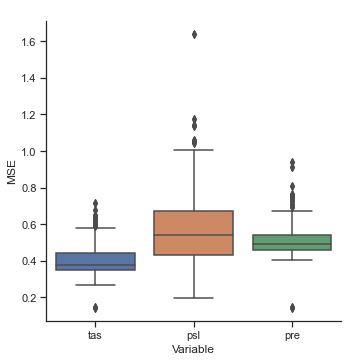

In [60]:
import seaborn as sns
sns.set_theme(style="white")
sns.set_style("ticks")


sns.catplot(
    kind = "box",
    x = "cat",
    y = "error",
    data = df
).set(title=" ", ylabel="MSE", xlabel="Variable")

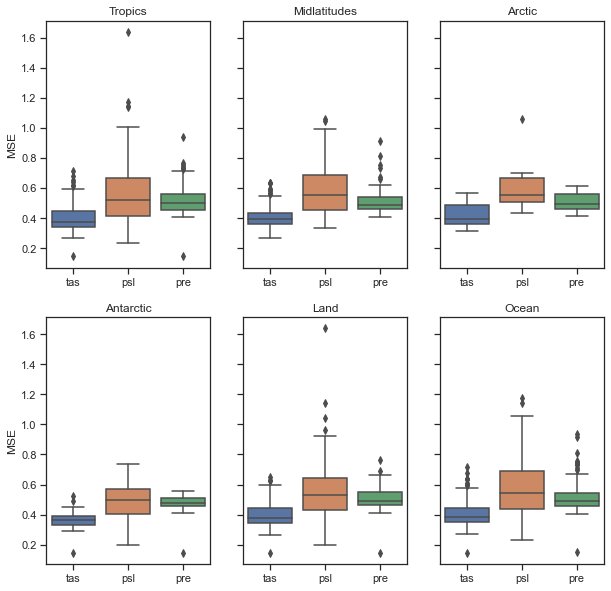

In [61]:
fig, axes = plt.subplots(figsize =(10, 10), nrows=2, ncols=3, sharey=True) # create 2x3 array of subplots
sns.boxplot(data=tropic,x = "cat", y = "error", ax=axes[0,0]).set(title="Tropics", ylabel="MSE", xlabel="")
sns.boxplot(data=temperate,x = "cat", y = "error", ax=axes[0,1]).set(title="Midlatitudes", ylabel="", xlabel="")
sns.boxplot(data=arctic, x = "cat",y = "error", ax=axes[0,2]).set(title="Arctic", ylabel="", xlabel="")
sns.boxplot(data=antarctic,x = "cat", y = "error", ax=axes[1,0]).set(title="Antarctic", ylabel="MSE", xlabel="")
sns.boxplot(data=land,x = "cat",y = "error", ax=axes[1,1]).set(title="Land", ylabel="", xlabel="")
sns.boxplot(data=sea,x = "cat",y = "error", ax=axes[1,2]).set(title="Ocean", ylabel="", xlabel="")
#fig.suptitle('Region-wise MSE for Sea Level Pressure Prediction')
plt.show()

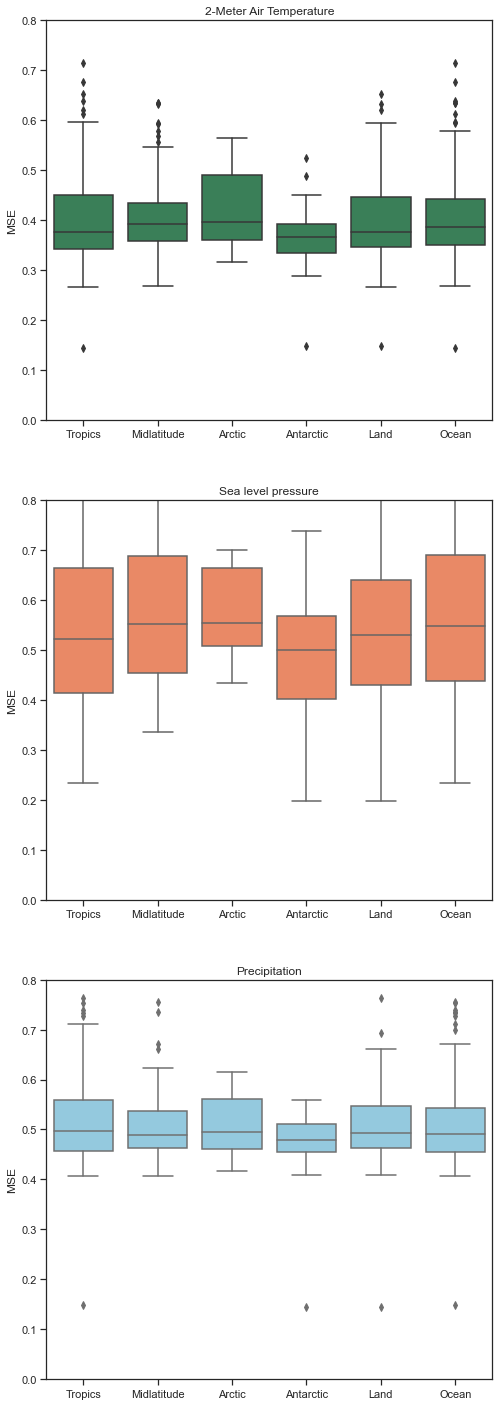

In [62]:
fig, axes = plt.subplots(figsize =(8, 25), nrows=3, ncols=1, sharex=False) # create 2x2 array of subplots
sns.boxplot(data=region_df_tas,x = "region", y = "error", color='seagreen', ax=axes[0]).set(title="2-Meter Air Temperature", 
                                                                                            ylabel="MSE", xlabel="", ylim=(0, 0.8))
sns.boxplot(data=region_df_psl,x = "region", y = "error", color='coral', ax=axes[1]).set(title="Sea level pressure", 
                                                                                         ylabel="MSE", xlabel="", ylim=(0, 0.8))
sns.boxplot(data=region_df_pre, x = "region",y = "error", color='skyblue', ax=axes[2]).set(title="Precipitation", 
                                                                                           ylabel="MSE", xlabel="", ylim=(0, 0.8))
#fig.suptitle('Region-wise MSE for Sea Level Pressure Prediction')
plt.show()

In [63]:
temperate

,Lon,Lat,error,lsmask,cat,region
0,-90.000000,58.282526,0.376618,1,tas,Midlatitude
1,-90.000000,-58.282526,0.527167,0,tas,Midlatitude
2,90.000000,58.282526,0.465080,1,tas,Midlatitude
3,90.000000,-58.282526,0.366807,0,tas,Midlatitude
6,0.000000,-31.717474,0.357368,0,tas,Midlatitude
...,...,...,...,...,...,...
187,-44.352404,-57.555496,0.552444,0,pre,Midlatitude
189,-5.906075,-37.998585,0.755635,0,pre,Midlatitude
190,-21.340566,-49.345531,0.914354,0,pre,Midlatitude
195,74.846215,-59.874637,0.471831,0,pre,Midlatitude
